In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


### **Read Dataset**

In [6]:
df=pd.read_csv("C:/Users/Dell/Downloads/Combined Data.csv")

In [7]:
df

Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]

### **Data Preprocessing**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isnull().sum()

statement    0
status       0
dtype: int64

In [13]:
# Get most common words
all_words=[]

for line in df['statement']:
    words=line.split()
    for word in words:
        if len(word)>2:
            all_words.append(word.lower())

Counter(all_words).most_common(50) 

[('and', 174838),
 ('the', 126412),
 ('not', 74161),
 ('have', 69143),
 ('that', 64432),
 ('but', 55707),
 ('for', 53663),
 ('just', 48452),
 ('this', 41661),
 ('with', 40552),
 ('was', 37232),
 ('like', 37128),
 ('feel', 31010),
 ('you', 28826),
 ('want', 26851),
 ('about', 24678),
 ('all', 23657),
 ('because', 22234),
 ('know', 22052),
 ('what', 22042),
 ('been', 21832),
 ('get', 21507),
 ('when', 19502),
 ('they', 19227),
 ('can', 18706),
 ('even', 18505),
 ('are', 18462),
 ('will', 18388),
 ('how', 18167),
 ('out', 18154),
 ('had', 17996),
 ('would', 16686),
 ('myself', 16273),
 ('she', 16063),
 ('really', 15916),
 ('life', 15790),
 ('from', 15199),
 ('cannot', 14968),
 ('people', 14523),
 ('time', 13741),
 ('one', 13512),
 ('going', 13424),
 ('now', 12796),
 ('think', 12477),
 ('never', 11685),
 ('being', 11448),
 ('there', 11433),
 ('her', 11360),
 ("i'm", 11122),
 ('has', 11102)]

In [14]:
# Define StopWords
stop_words=stopwords.words('english')

In [15]:
def text_preprocessing(text):
    # Make all words lowercase
    text=text.lower()

    # Remove  punction,number & spical char
    text=re.sub('[^a-zA-z]',' ',text)
 
    # Single char removel
    text=re.sub(r'\s+[a-zA-z]\s+',' ',text)

    # Remove multi spaces
    text=re.sub(r'\s+',' ',text)

    # Make a sentence to toknize
    tokens=word_tokenize(text)

    # Remove Stopwords
    final_token=[i for i in tokens if i not in stop_words]

    # Apply lemma
    final_words=[]
    lemma=WordNetLemmatizer()
    for i in final_token:
        if len(i)>2:
            word=lemma.lemmatize(i)
            final_words.append(word)
    return ' '.join(final_words)

In [16]:
df['Clean_Text']=df['statement'].apply(lambda x: text_preprocessing(x))
print('Text Preprocessing is done')

Text Preprocessing is done


###

### **Data Visualization**

In [17]:
target=df['status'].unique()

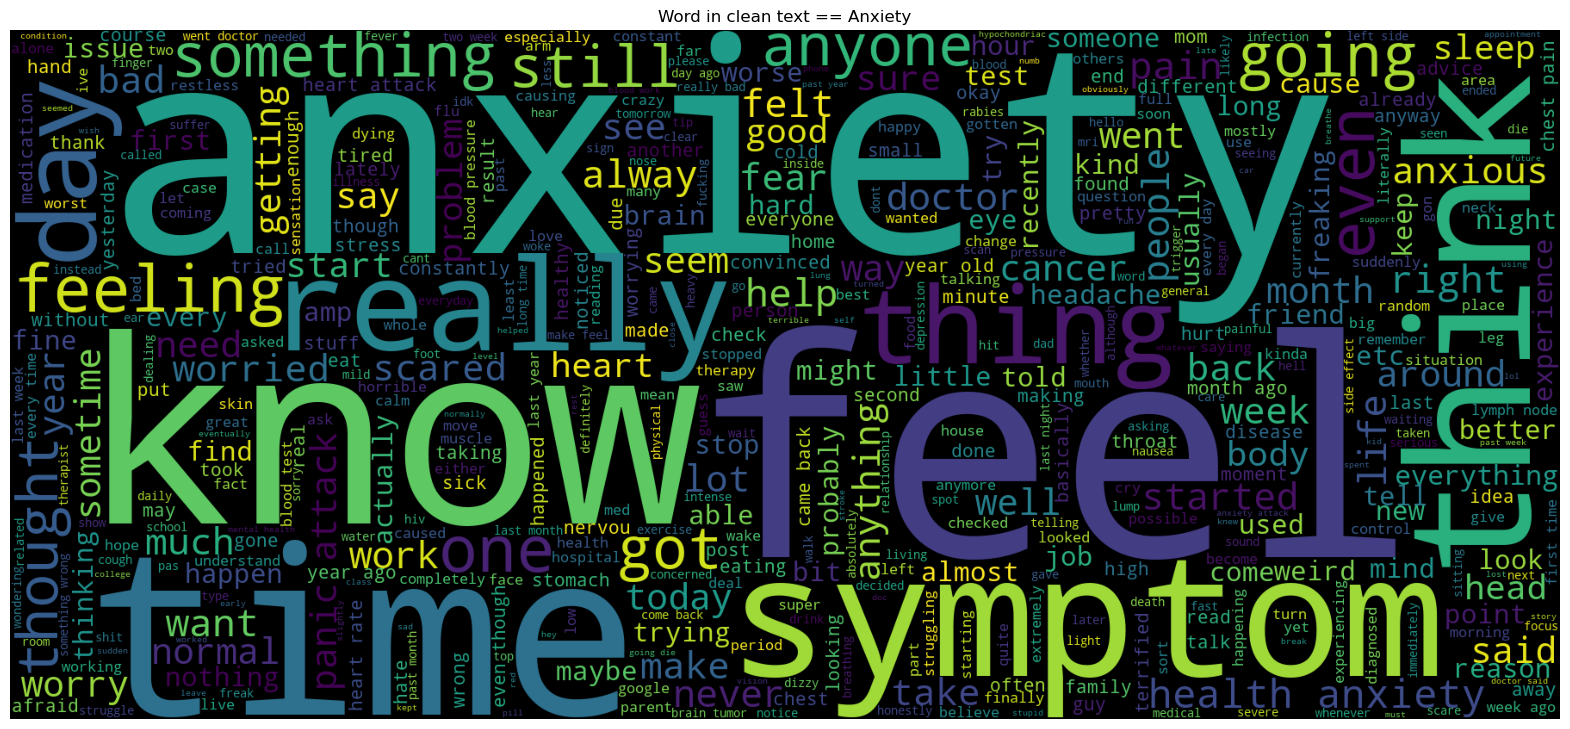

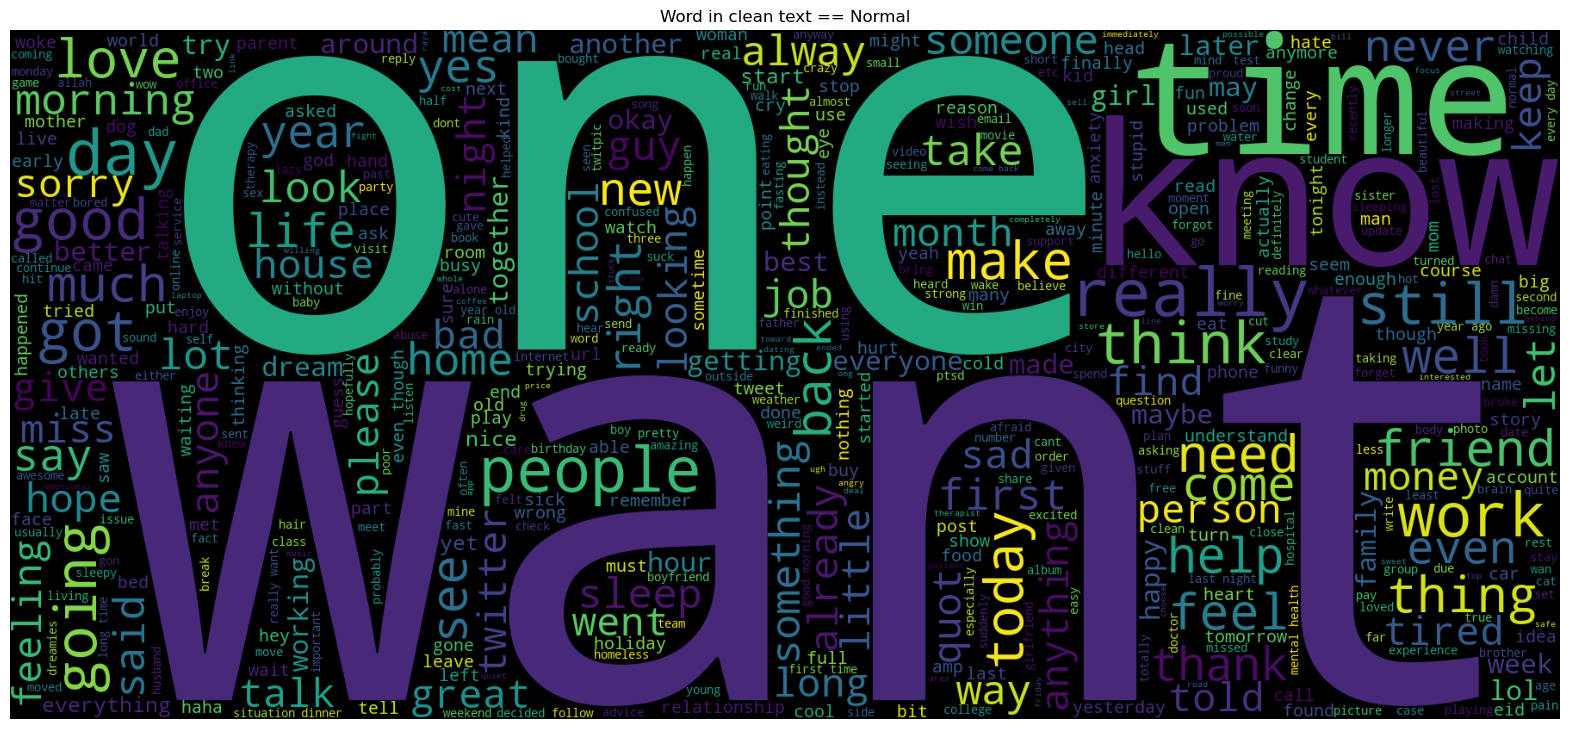

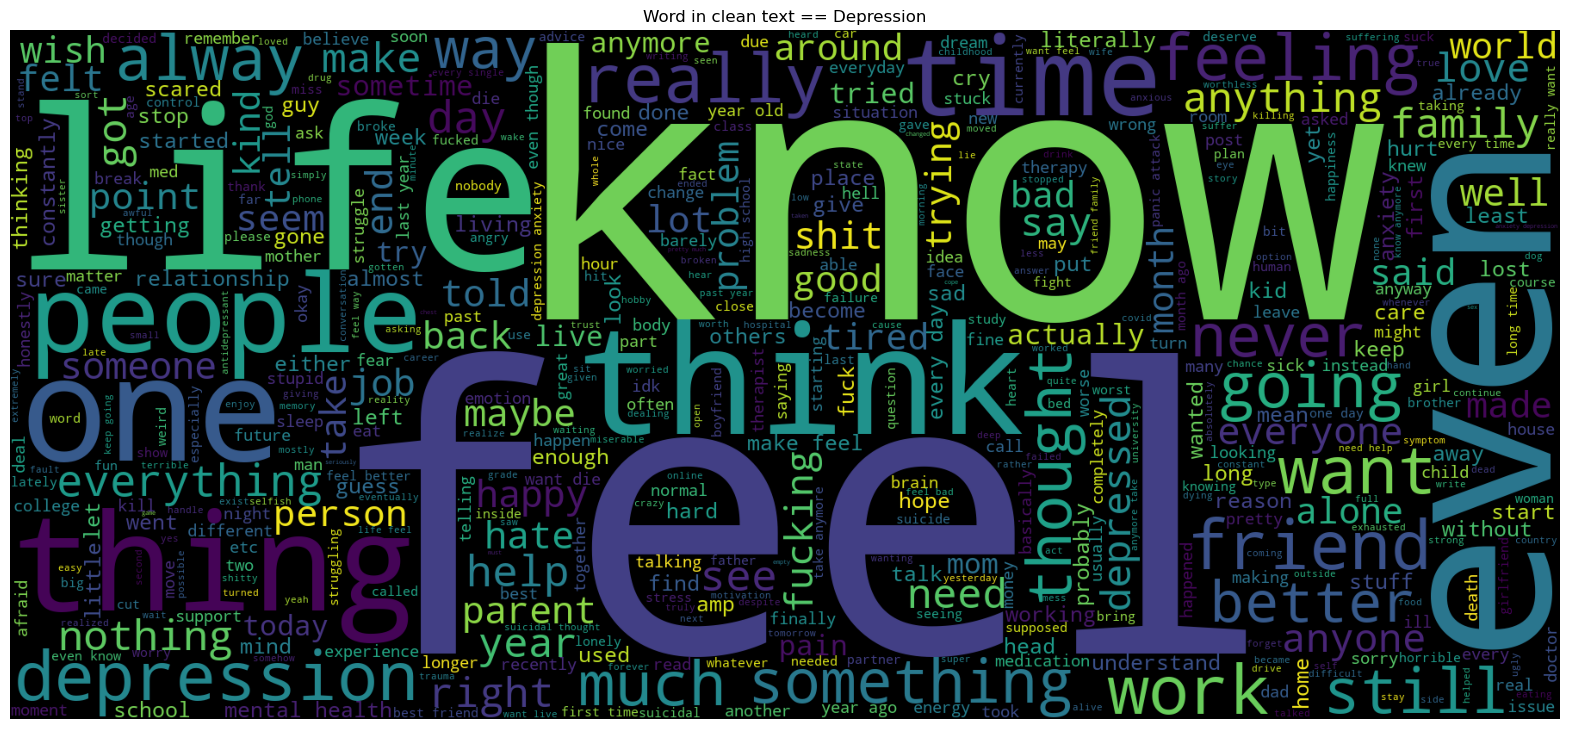

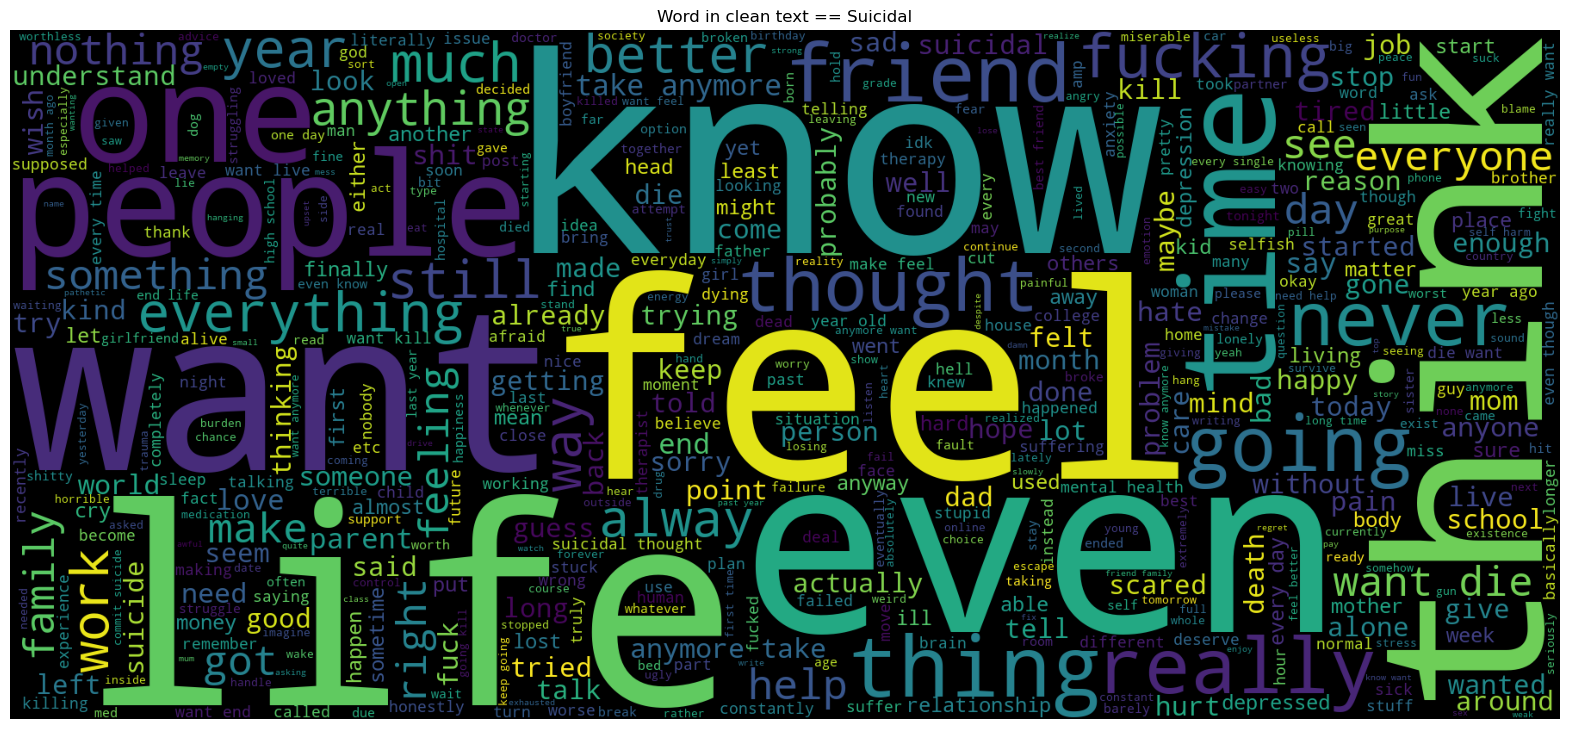

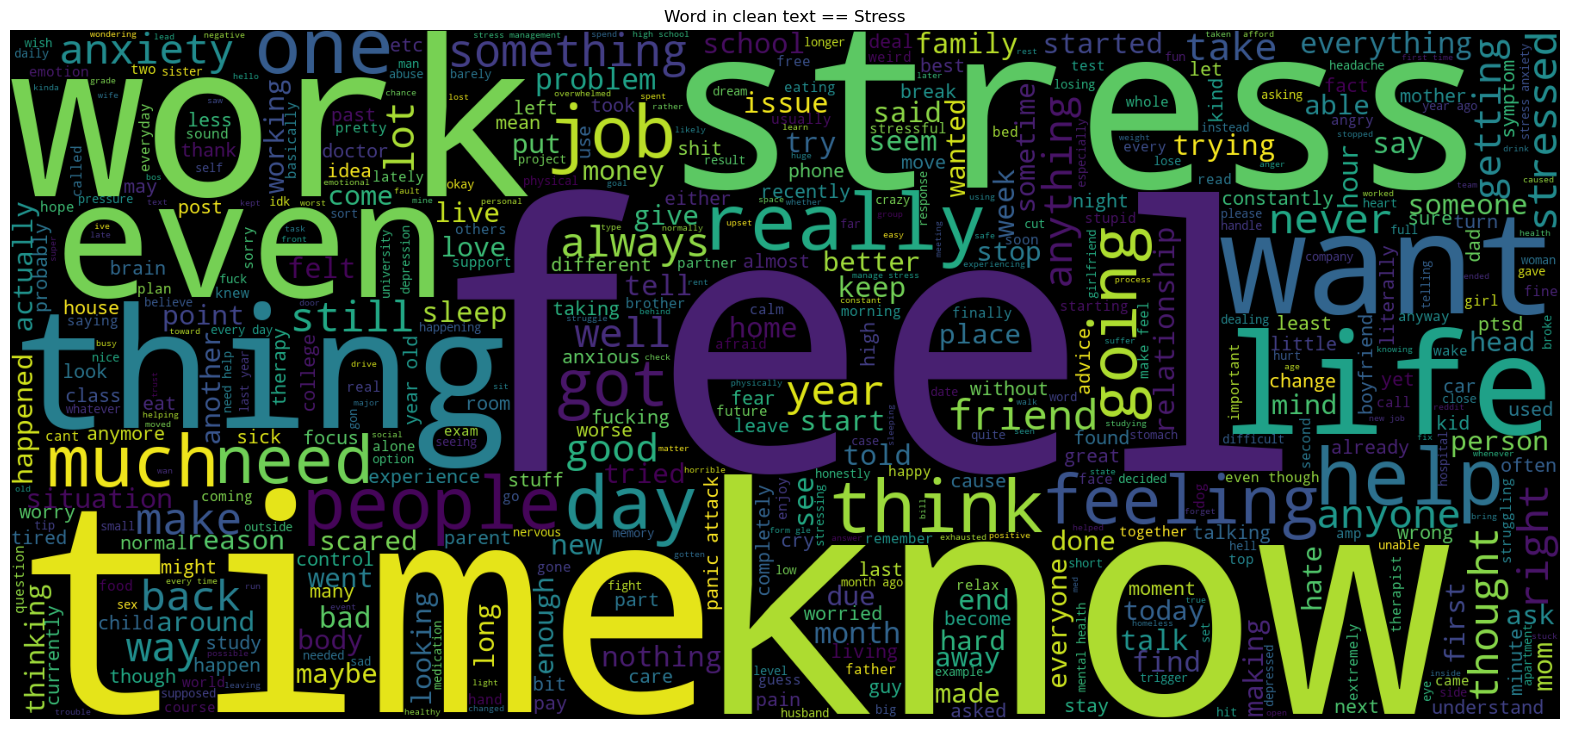

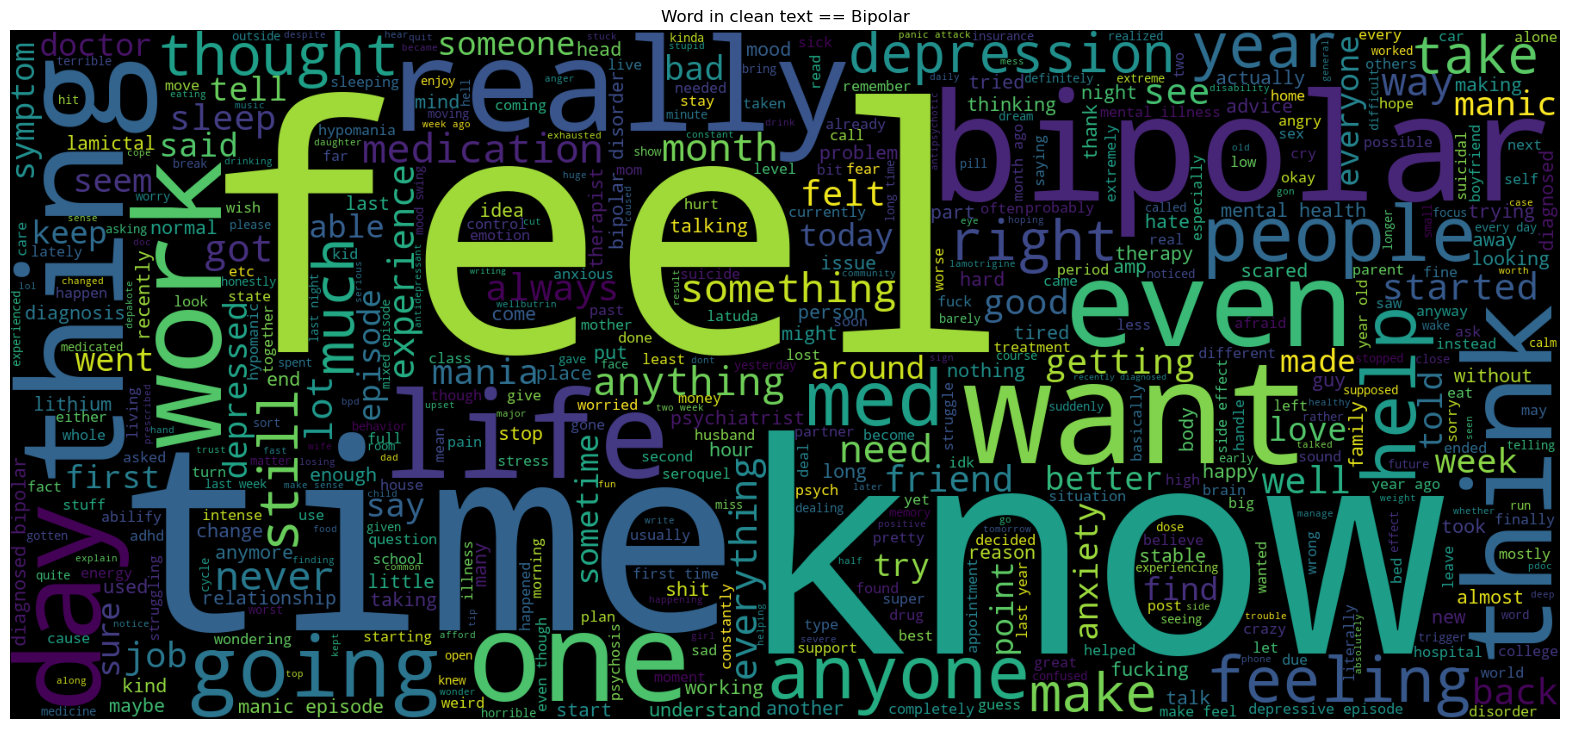

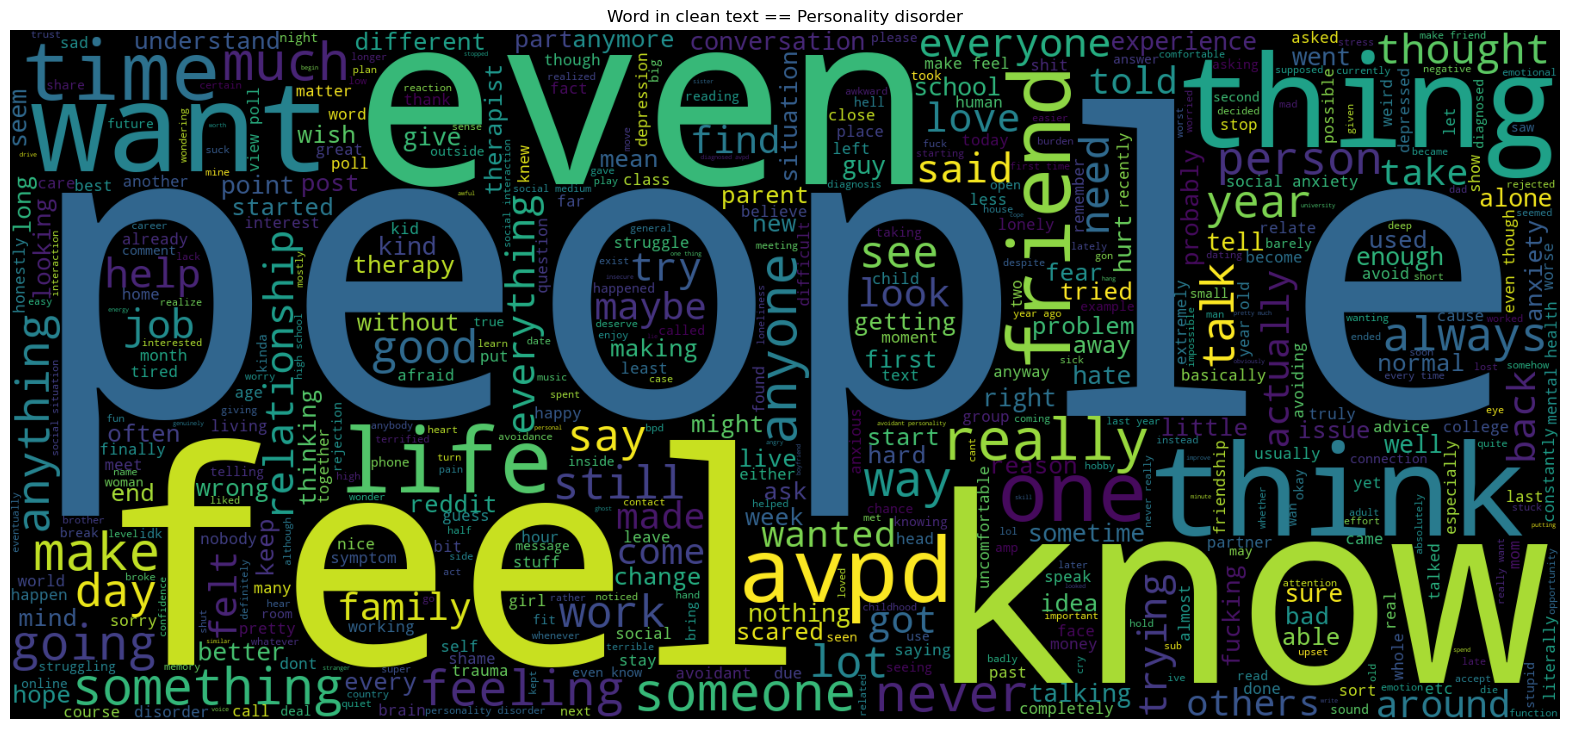

In [18]:
for i in target:
    plt.figure(figsize=(20,15))
    word_cloud=WordCloud(width=1800,height=800,max_words=500).generate(' '.join(df[df.status == i].Clean_Text))
    plt.imshow(word_cloud)
    plt.title(f'Word in clean text == {i}')
    plt.axis('off')
    plt.show()

In [31]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
x=df['Clean_Text']
y=df['status']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

### **Text Preprocessing**

In [21]:
# Convert word to number
tokenizer=Tokenizer(num_words=10000)

# Creat a mapping of words to number 
tokenizer.fit_on_texts(x_train)

# Transforming text into sequences
x_train_seq=tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [22]:
# Padding---> Ensuring all sequences are of the same lenght
max_len=100

x_train_pad=pad_sequences(x_train_seq,maxlen=max_len)
x_test_pad=pad_sequences(x_test_seq,maxlen=max_len)

In [23]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y_train_enc=label.fit_transform(y_train)
y_test_enc=label.transform(y_test)

### **Build Model**

In [24]:
model=Sequential()

model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_len))
model.add(BatchNormalization())
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))
model.summary()

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(
    x_train_pad, 
    y_train_enc, 
    epochs=10,  
    batch_size=32, 
    validation_data=(x_test_pad,y_test_enc)
)


Epoch 1/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 99s 72ms/step - accuracy: 0.6019 - loss: 1.0814 - val_accuracy: 0.7336 - val_loss: 0.7031
Epoch 2/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 93s 70ms/step - accuracy: 0.7702 - loss: 0.6249 - val_accuracy: 0.7444 - val_loss: 0.6835
Epoch 3/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 0.8235 - loss: 0.4960 - val_accuracy: 0.7400 - val_loss: 0.7079
Epoch 4/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 91s 69ms/step - accuracy: 0.8616 - loss: 0.3909 - val_accuracy: 0.7350 - val_loss: 0.7814
Epoch 5/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 93s 71ms/step - accuracy: 0.8953 - loss: 0.3029 - val_accuracy: 0.7314 - val_loss: 0.8970
Epoch 6/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 95s 72ms/step - accuracy: 0.9118 - loss: 0.2609 - val_accuracy: 0.7307 - val_loss: 0.9894
Epoch 7/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 86s 65ms/step - accuracy: 0.9330 - loss: 0.2033 - val_accuracy: 0.7289 - val_loss: 1.0836
Epoch 8/10
1317/1317 ━━━━━━━━━━━━━━━━━━━━ 84s 64ms/step - accuracy: 0.9431 -

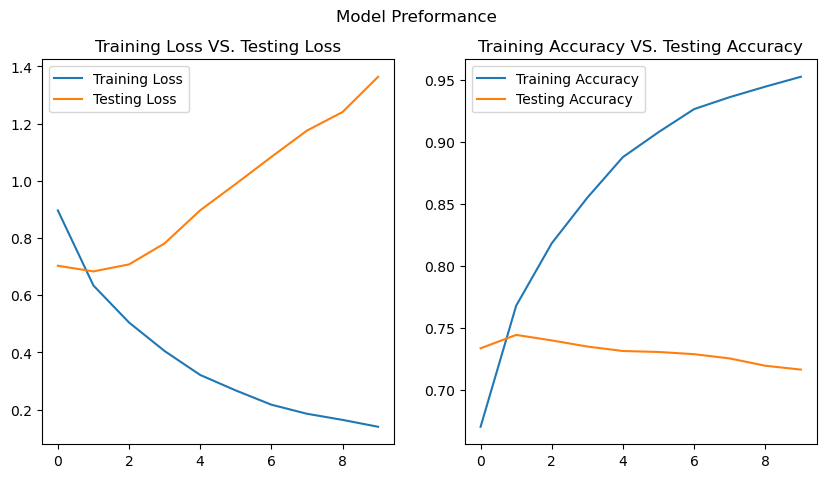

In [27]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Model Preformance')
ax[0].plot(history.history['loss'],label='Training Loss')
ax[0].plot(history.history['val_loss'],label='Testing Loss')
ax[0].set_title('Training Loss VS. Testing Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'],label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title('Training Accuracy VS. Testing Accuracy')
ax[1].legend()

### **Test model**

In [28]:
y_pred=model.predict(x_test_pad)
y_pred_class=np.argmax(y_pred,axis=1)
y_pred_label=label.inverse_transform(y_pred_class)

330/330 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [29]:

for i in range(10):
    print(f"Text: {x_test.iloc[i]}")
    print(f"True label:      {label.inverse_transform([y_test_enc[i]])[0]}")
    print(f"Predicted label: {label.inverse_transform([y_pred_class[i]])[0]}")
    print()


Text: lazy complain ihh
True label:      Normal
Predicted label: Normal

Text: think wifi iphone broken quot connect quot actually use another story
True label:      Normal
Predicted label: Normal

Text: good tracking apps trying find apps track overall mood symptom currently mixed episode every app installed asks overall mood day currently going multiple time day also experiencing symptom mania depression time anyone know apps good tracking
True label:      Bipolar
Predicted label: Bipolar

Text: recently looked reddit found place actually quite healthy supportive know place really existed anyways little motivation work way employment ladder whether career min wage job feel career really interested helping people box thinker know job slice head try quacking maybe serve people first profit second think much say look young seems turn girl initially tried psych communication major college dropped someone way handed red pill since year ago since happened studying different source internet